# Construindo um Modelo de Regressão Linear com TensorFlow

In [2]:
# Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Warnings
import warnings as wn
wn.filterwarnings('ignore')

## Definindo os hyperparâmetros do modelo

In [22]:
# Hyperparâmetros do modelo
learning_rate = 0.01
training_epochs = 10000
display_step = 200

## Definindo os datasets de treino e de teste

## Considere X como o tamanho de uma casa e y o preço de uma casa

In [24]:
# Dataset de treino
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]
 
# Dataset de teste
test_X = np.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
test_y = np.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

## Placeholders e variáveis

In [25]:
# Placeholders para as variáveis preditoras (x) e para variável target (y)
X = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# Pesos e bias do modelo
W = tf.Variable(np.random.randn(), name='weight')
b = tf.Variable(np.random.randn(), name='bias')

## Construindo o modelo

In [26]:
# Construindo o modelo linear
# Fórmula do modelo linear: y = W*X + b
linear_model = W*X + b

# Mean squared error (erro quadrado médio)
cost = tf.reduce_sum(tf.square(linear_model - y)) / (2*n_samples)

# Otimização com Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

## Executando o grafo computacional, treinando e testando o modelo

Epoch:   200 	 Cost:     0.148 	 W:0.1004 	 b: 1.871
Epoch:   400 	 Cost:    0.1207 	 W:0.1331 	 b:  1.64
Epoch:   600 	 Cost:    0.1038 	 W:0.1586 	 b: 1.458
Epoch:   800 	 Cost:   0.09349 	 W:0.1787 	 b: 1.316
Epoch:  1000 	 Cost:   0.08711 	 W:0.1944 	 b: 1.204
Epoch:  1200 	 Cost:    0.0832 	 W:0.2068 	 b: 1.117
Epoch:  1400 	 Cost:   0.08078 	 W:0.2164 	 b: 1.048
Epoch:  1600 	 Cost:    0.0793 	 W: 0.224 	 b:0.9945
Epoch:  1800 	 Cost:   0.07839 	 W:  0.23 	 b:0.9523
Epoch:  2000 	 Cost:   0.07783 	 W:0.2347 	 b:0.9192
Epoch:  2200 	 Cost:   0.07748 	 W:0.2383 	 b:0.8932
Epoch:  2400 	 Cost:   0.07727 	 W:0.2412 	 b:0.8729
Epoch:  2600 	 Cost:   0.07714 	 W:0.2434 	 b:0.8569
Epoch:  2800 	 Cost:   0.07706 	 W:0.2452 	 b:0.8444
Epoch:  3000 	 Cost:   0.07701 	 W:0.2466 	 b:0.8345
Epoch:  3200 	 Cost:   0.07698 	 W:0.2477 	 b:0.8268
Epoch:  3400 	 Cost:   0.07696 	 W:0.2485 	 b:0.8208
Epoch:  3600 	 Cost:   0.07695 	 W:0.2492 	 b: 0.816
Epoch:  3800 	 Cost:   0.07694 	 W:0.2497 	 b:

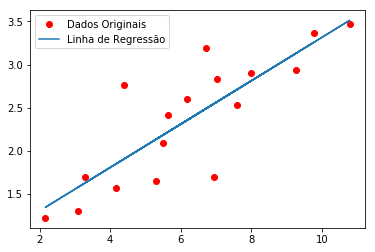

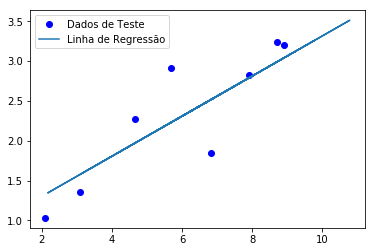

In [27]:
# Definindo a inicialização das variáveis
init = tf.global_variables_initializer()

# Iniciando a sessão
with tf.Session() as sess:
    # Iniciando as variáveis
    sess.run(init)
    
    # Treinamento do modelo
    for epoch in range(training_epochs):

        # Otimização com Gradient Descent
        sess.run(optimizer, feed_dict={X: train_X, y: train_y})

        # Display de cada epoch
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, y: train_y})
            print('Epoch:{0:6} \t Cost:{1:10.4} \t W:{2:6.4} \t b:{3:6.4}'.format(epoch+1, c, sess.run(W), sess.run(b)))

    # Imprimindo os parâmetros finais do modelo
    print('\nOtimização Concluída!')
    training_cost = sess.run(cost, feed_dict={X: train_X, y: train_y})
    print('Custo Final de Treinamento:', training_cost, ' - W Final:', sess.run(W), " - b Final:", sess.run(b), '\n')

    # Visualizando o resultado
    plt.plot(train_X, train_y, 'ro', label='Dados Originais')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Linha de Regressão')
    plt.legend()
    plt.show()

    # Testando o modelo
    testing_cost = sess.run(tf.reduce_sum(tf.square(linear_model - y)) / (2 * test_X.shape[0]),
                            feed_dict={X: test_X, y: test_y})

    # Display em Teste
    plt.plot(test_X, test_y, 'bo', label='Dados de Teste')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Linha de Regressão')
    plt.legend()
    plt.show()

sess.close()
